In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
import scipy.stats as stats
import statsmodels.api as sm

In [32]:
#đọc dữ liệu
data = pd.read_csv('data\Case_study_CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [33]:
data.shape

(205, 26)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.isna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
#check khuyet thieu + ngoai lai : 
#khuyet thieu : 
missing_values_count = data.isnull().sum()
missing_values_count

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

không có dữ liệu khuyết thiếu

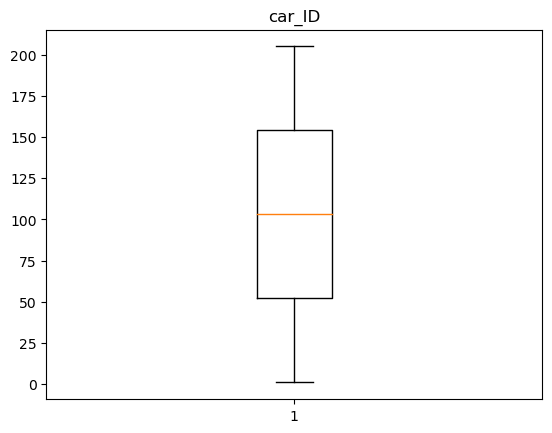

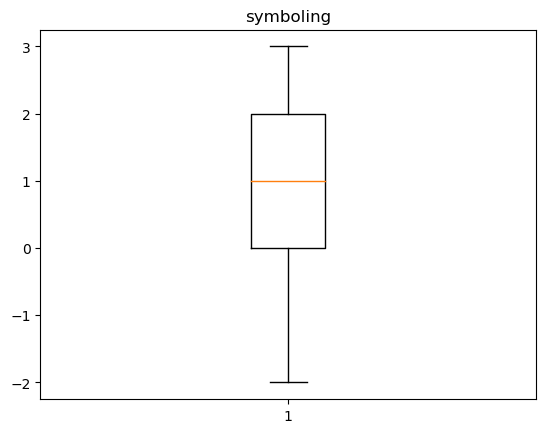

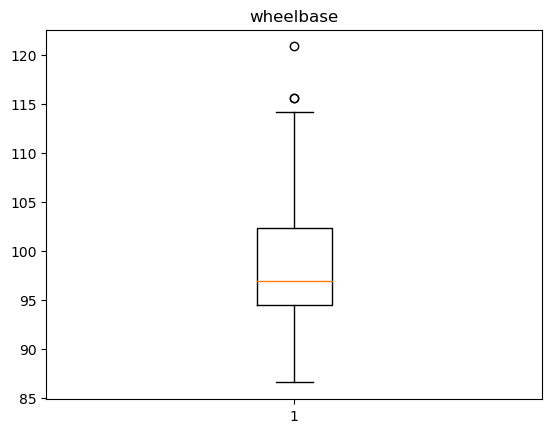

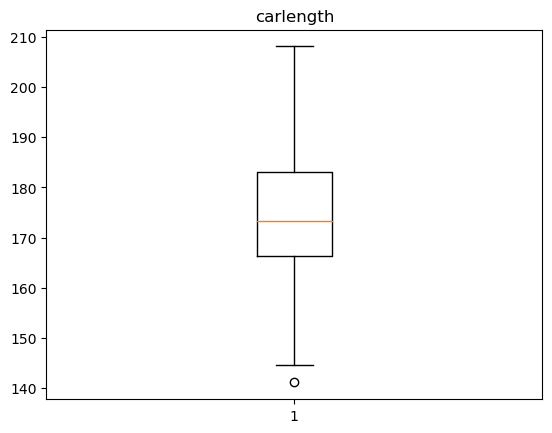

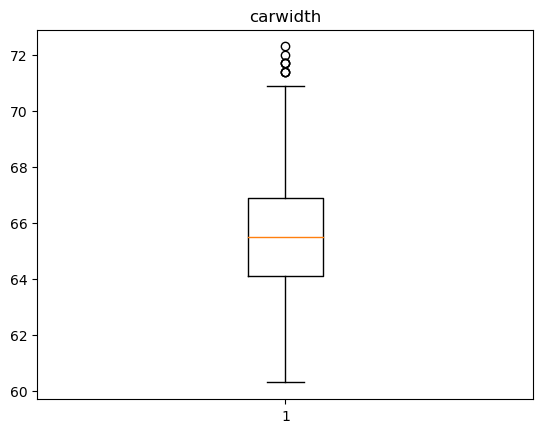

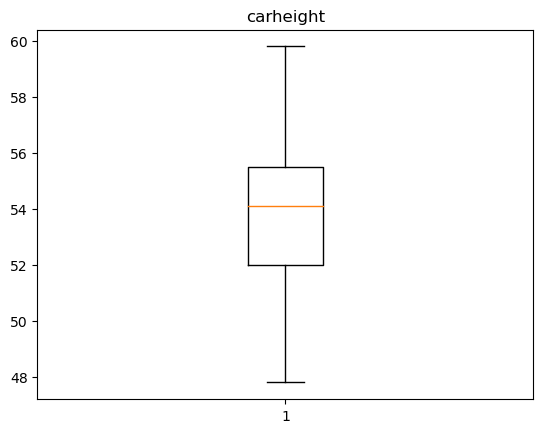

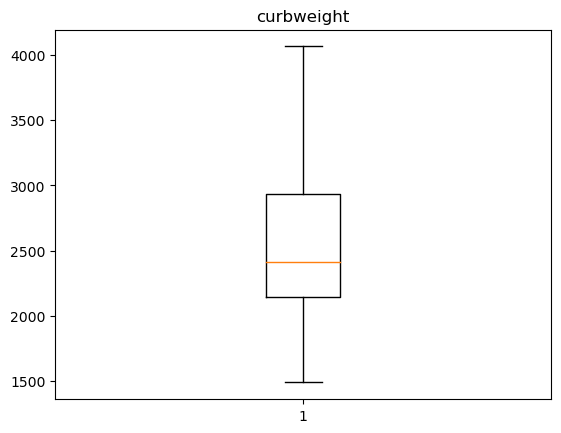

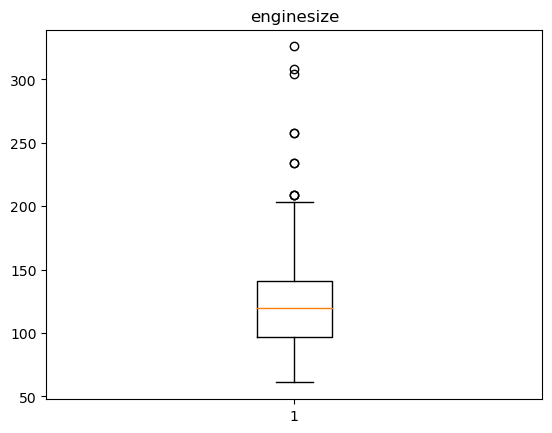

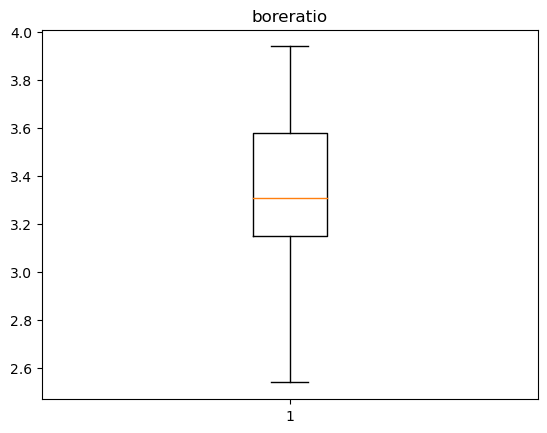

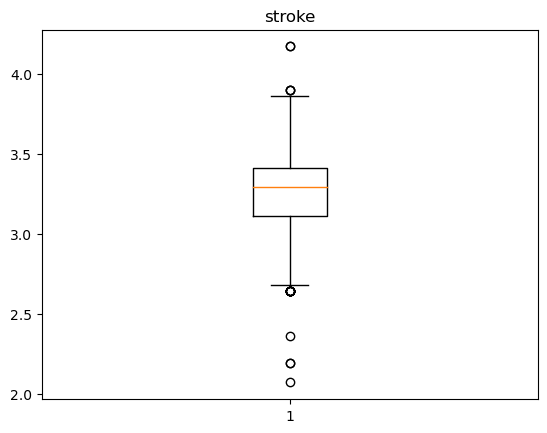

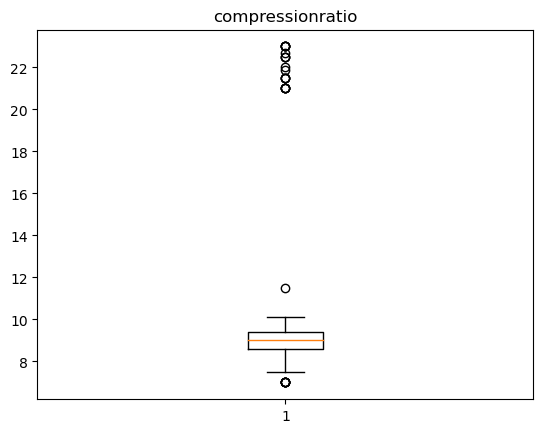

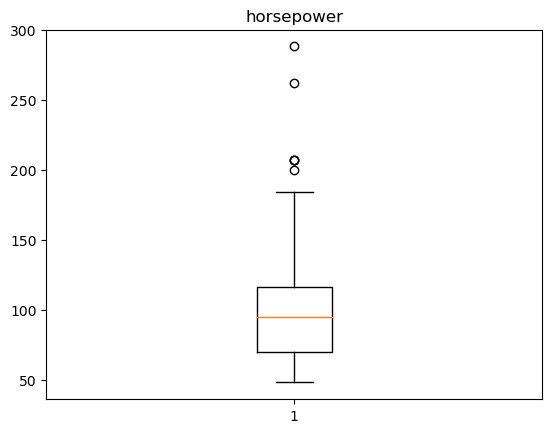

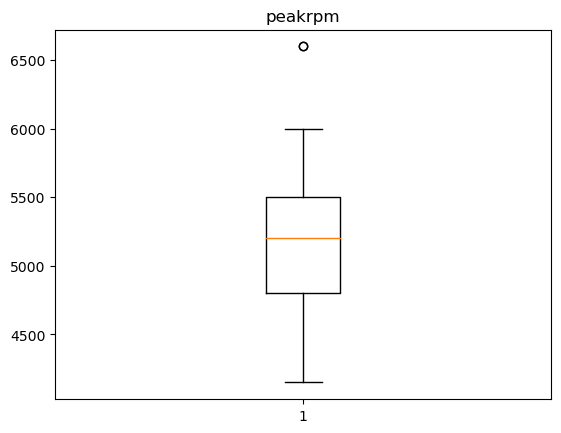

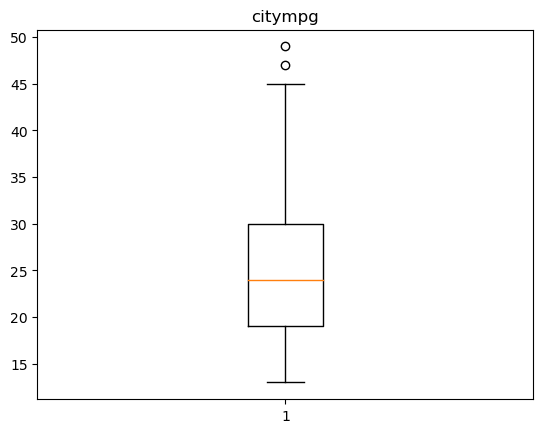

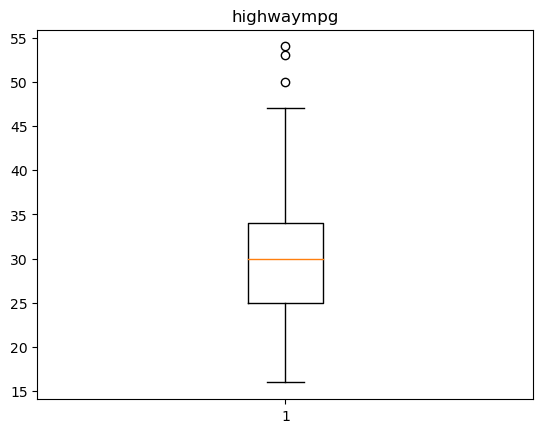

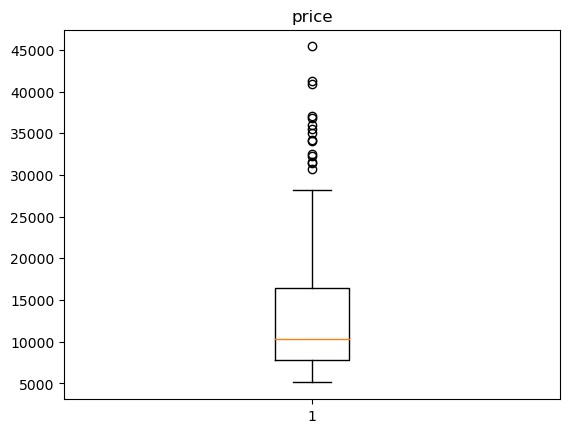

In [8]:
#kiểm tra ngoại lai bằng boxplot
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        plt.boxplot(data[column])
        plt.title(f'{column}')
        plt.show()

Trong một số trường hợp, việc loại bỏ dữ liệu ngoại lai có thể dẫn đến mất mát thông tin quan trọng hoặc thậm chí làm sai lệch kết quả . Nên ta không nên loại bỏ các giá trị ngoại lai trong bộ dữ liệu này

car_ID : Mã xe \
smboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro) \
CarName: Tên xe \
fueltype: Loại nhiên liệu\ 
aspiration: loại hút (turbo hoặc std) \
doornumber: Số lượng cửa \
carbody: Loại thân xe (sedan, wagon, hatchback,...)\ 
drivewheel: Loại bánh xe \
enginelocation: Vị trí động cơ \
wheelbase: Chiều dài cơ sở \
carlength: Chiều dài xe \
carwidth: Chiều rộng xe \
carheight: Chiều cao xe \
curbweight: Trọng lượng của xe khi không có người hoặc hành lý \
enginetype: Loại động cơ \
cylindernumber: Số lượng xi lanh đặt trong xe \
enginesize: Kích thước động cơ \
fuelsystem: Hệ thống nhiên liệu của xe ô tô \
boreratio: Tỉ số hành trình \
stroke: số kỳ hoăc kích thước bên trong động cơ \
compressionratio: Tỉ số nén của ôtô \
horsepower: Mã lực \
peakrpm: Tốc độ động cơ cao nhất \
citympg: số dặm đi được cho 1 galon ( khoảng 4.5 lít) nhiên liệu trong thành phố \
highwaympg: số dặm đi được cho 1 galon (khoảng 4.5 lít) nhiên liệu trên đường cao tốc \
price: Giá xe\

In [9]:
#tách tên xe - hãng + tạo một cột mới
CarName_new = data["CarName"].str.split(" ", n = 1, expand = True)
data["CarBrand"]= CarName_new[0]
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
data['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

các hãng xe bị sai : \
alfa-romero thành alfa-romeo \
maxda thành mazda  \
nissan thành Nissan\
porcshce thành porsche\
toyouta thành toyota\
vokswagen thành volkswagen\
vw thành volkswagen

In [11]:
# Dùng hàm replace thay thế dữ liệu sai này
transform_CarBrand = {'alfa-romero':'alfa-romeo' ,'maxda':'mazda','nissan':'Nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
data = data.replace({'CarBrand' : transform_CarBrand})
data['CarBrand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Chuyển dữ liệu về đúng dạng 

In [12]:
transform_cylindernumber = {'four':4 ,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}
data = data.replace({'cylindernumber' : transform_cylindernumber})

In [13]:
transform_doornumber = {'two':2 ,'four':4}
data = data.replace({'doornumber' : transform_doornumber})

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [20]:
data1 = data.astype({'doornumber':float, 'curbweight':float
                , 'cylindernumber':float, 'enginesize':float, 'horsepower':float, 'peakrpm':float
                , 'citympg':float, 'highwaympg':float})
data1['enginelocation']

0      front
1      front
2      front
3      front
4      front
       ...  
200    front
201    front
202    front
203    front
204    front
Name: enginelocation, Length: 205, dtype: object

Tương quan , tần số, tần suất , heatmap 

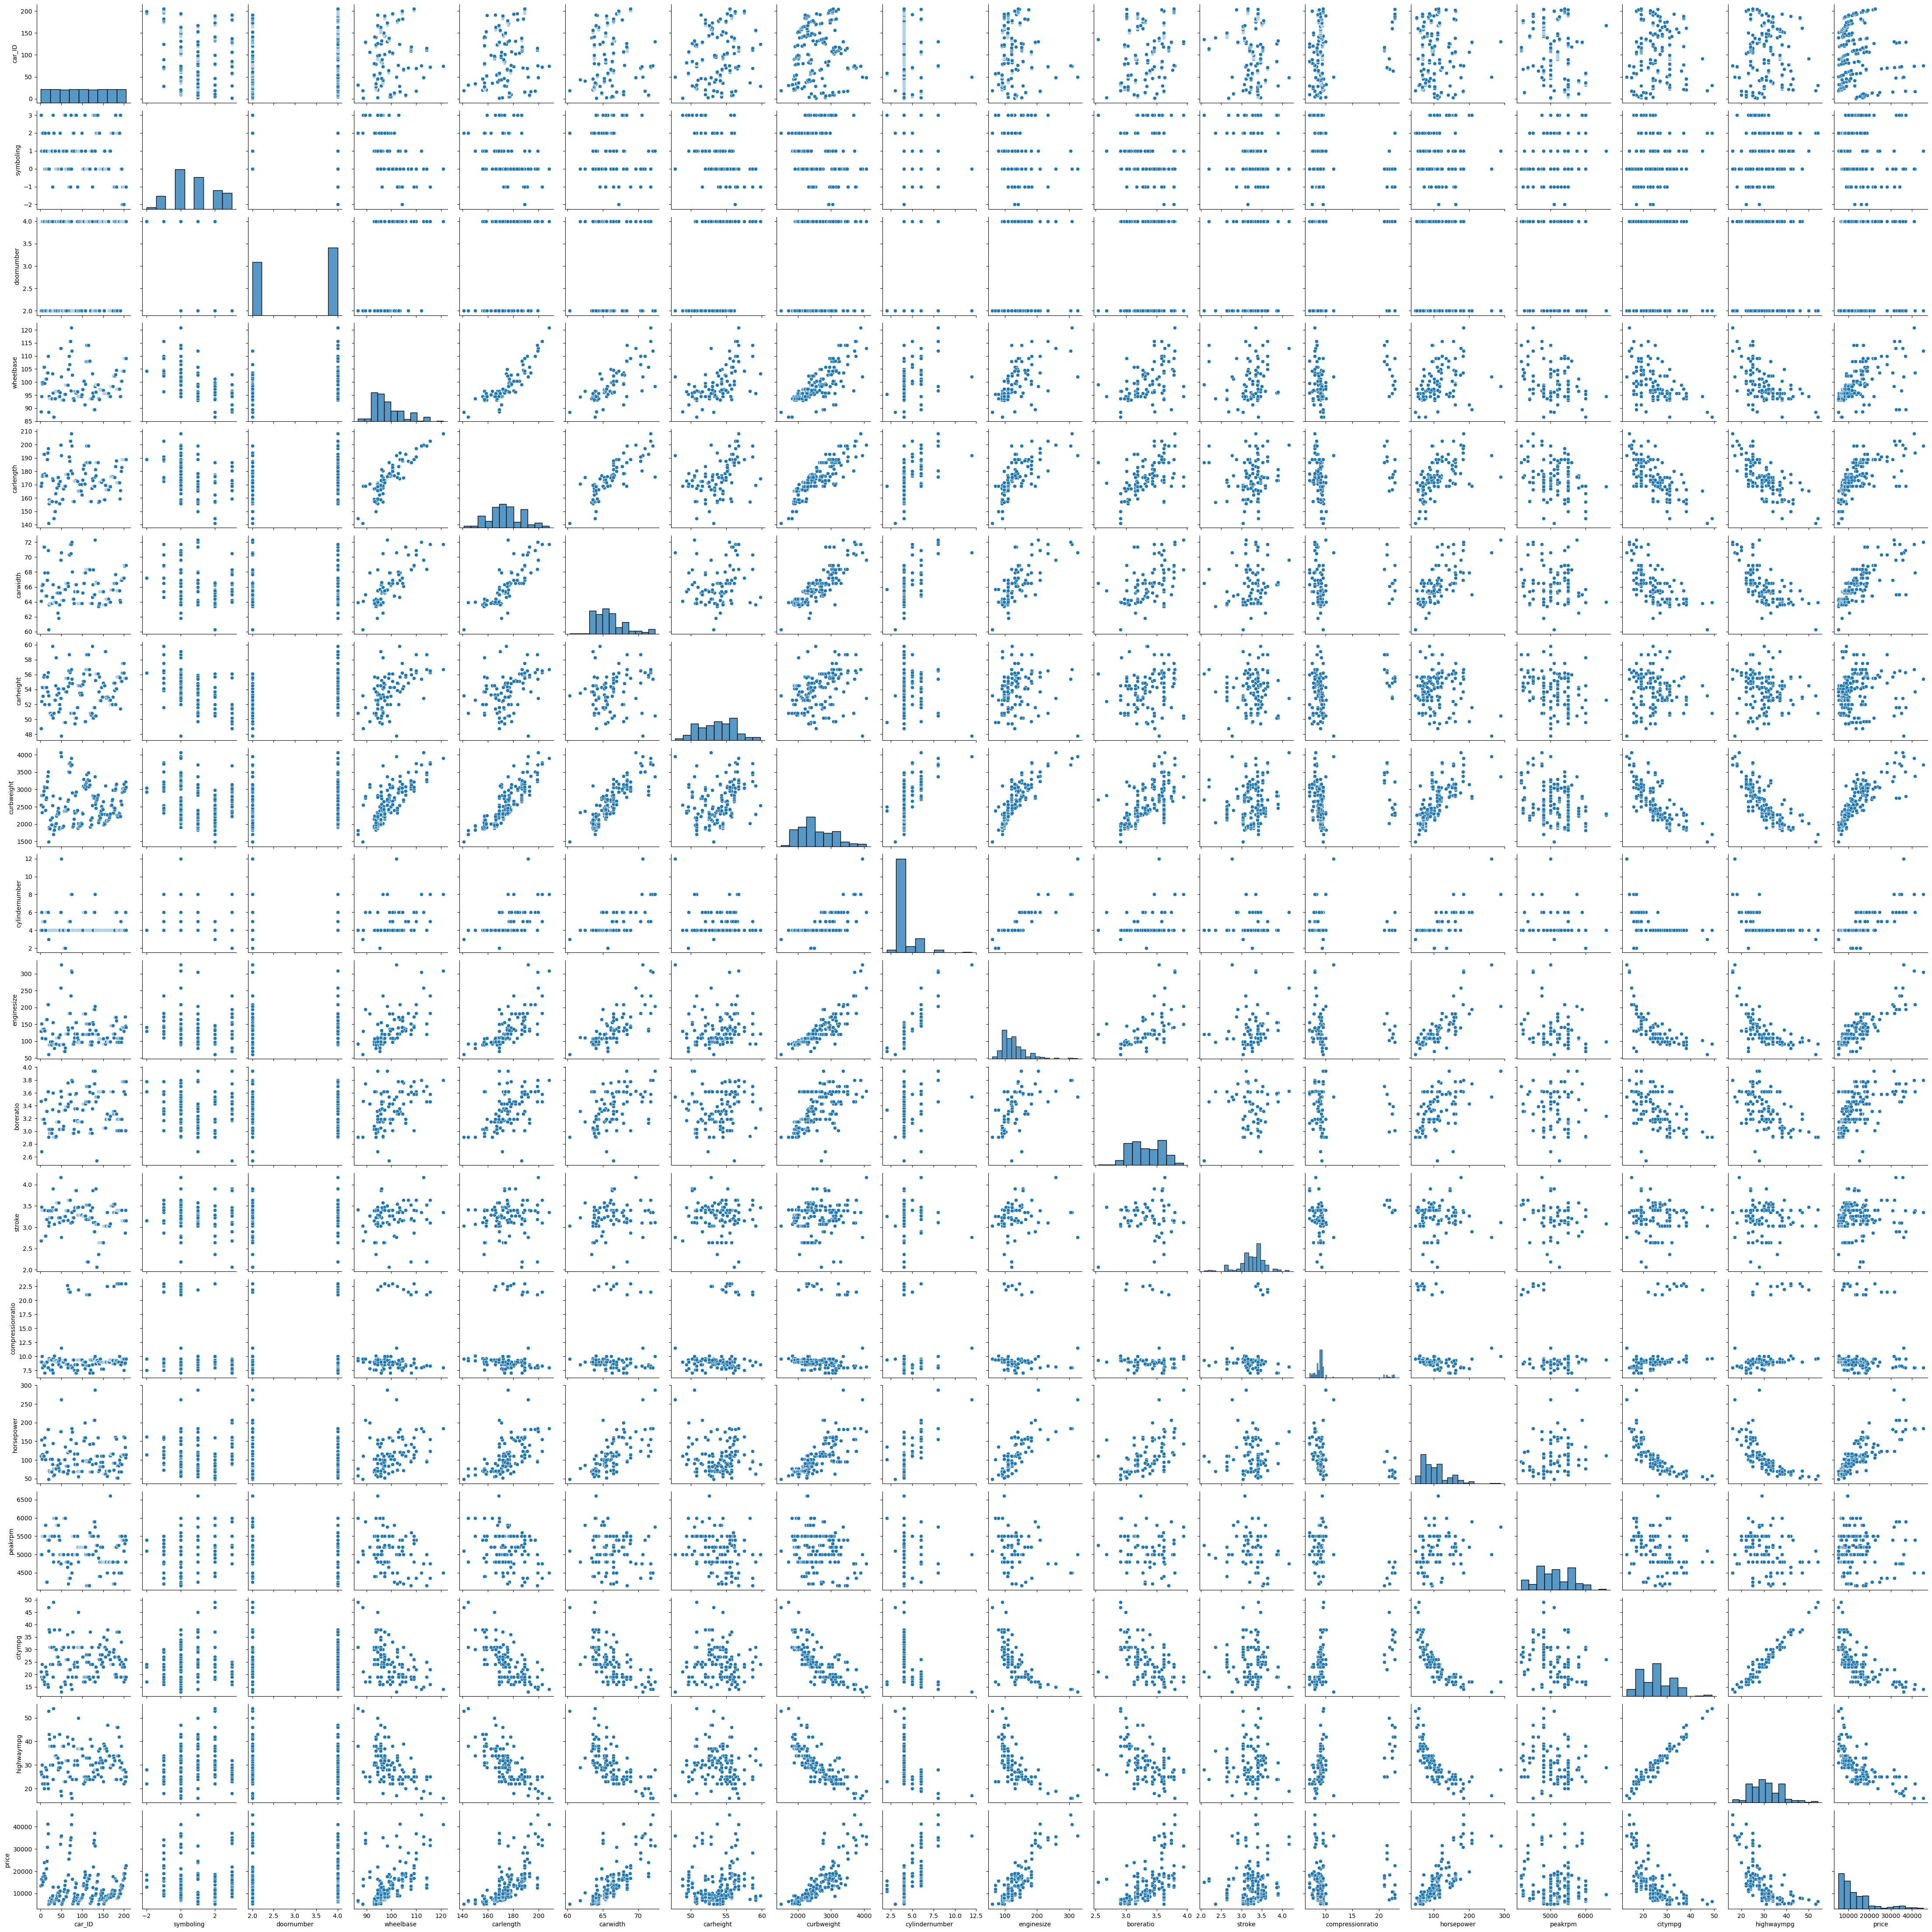

In [16]:
sns.pairplot(data1)

In [23]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    float64
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    float64
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    float64
 16  enginesize        205 non-null    float64
 1

In [25]:
dluong = ['doornumber','cylindernumber','wheelbase','carlength', 'carwidth', 'carheight','curbweight', 'enginesize', 'boreratio','stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg']
for i in dluong:
    r, pvalue = stats.pearsonr(data1[i], data1['price'])
    if pvalue < 0.05:
        print(f'Thuộc tính {i} và price có tương quan với giá trị r = {r}, giá trị pvalue = {pvalue}')

Thuộc tính cylindernumber và price có tương quan với giá trị r = 0.7183049020002833, giá trị pvalue = 8.028863372444832e-34
Thuộc tính wheelbase và price có tương quan với giá trị r = 0.57781559829215, giá trị pvalue = 1.1828204863378005e-19
Thuộc tính carlength và price có tương quan với giá trị r = 0.6829200156779622, giá trị pvalue = 1.6787066240746602e-29
Thuộc tính carwidth và price có tương quan với giá trị r = 0.7593252997415114, giá trị pvalue = 9.627437876120389e-40
Thuộc tính curbweight và price có tương quan với giá trị r = 0.8353048793372966, giá trị pvalue = 1.2144448264032206e-54
Thuộc tính enginesize và price có tương quan với giá trị r = 0.8741448025245117, giá trị pvalue = 1.3547637598648421e-65
Thuộc tính boreratio và price có tương quan với giá trị r = 0.5531732367984437, giá trị pvalue = 7.907922278249421e-18
Thuộc tính horsepower và price có tương quan với giá trị r = 0.8081388225362218, giá trị pvalue = 1.483436573293965e-48
Thuộc tính citympg và price có tương qu

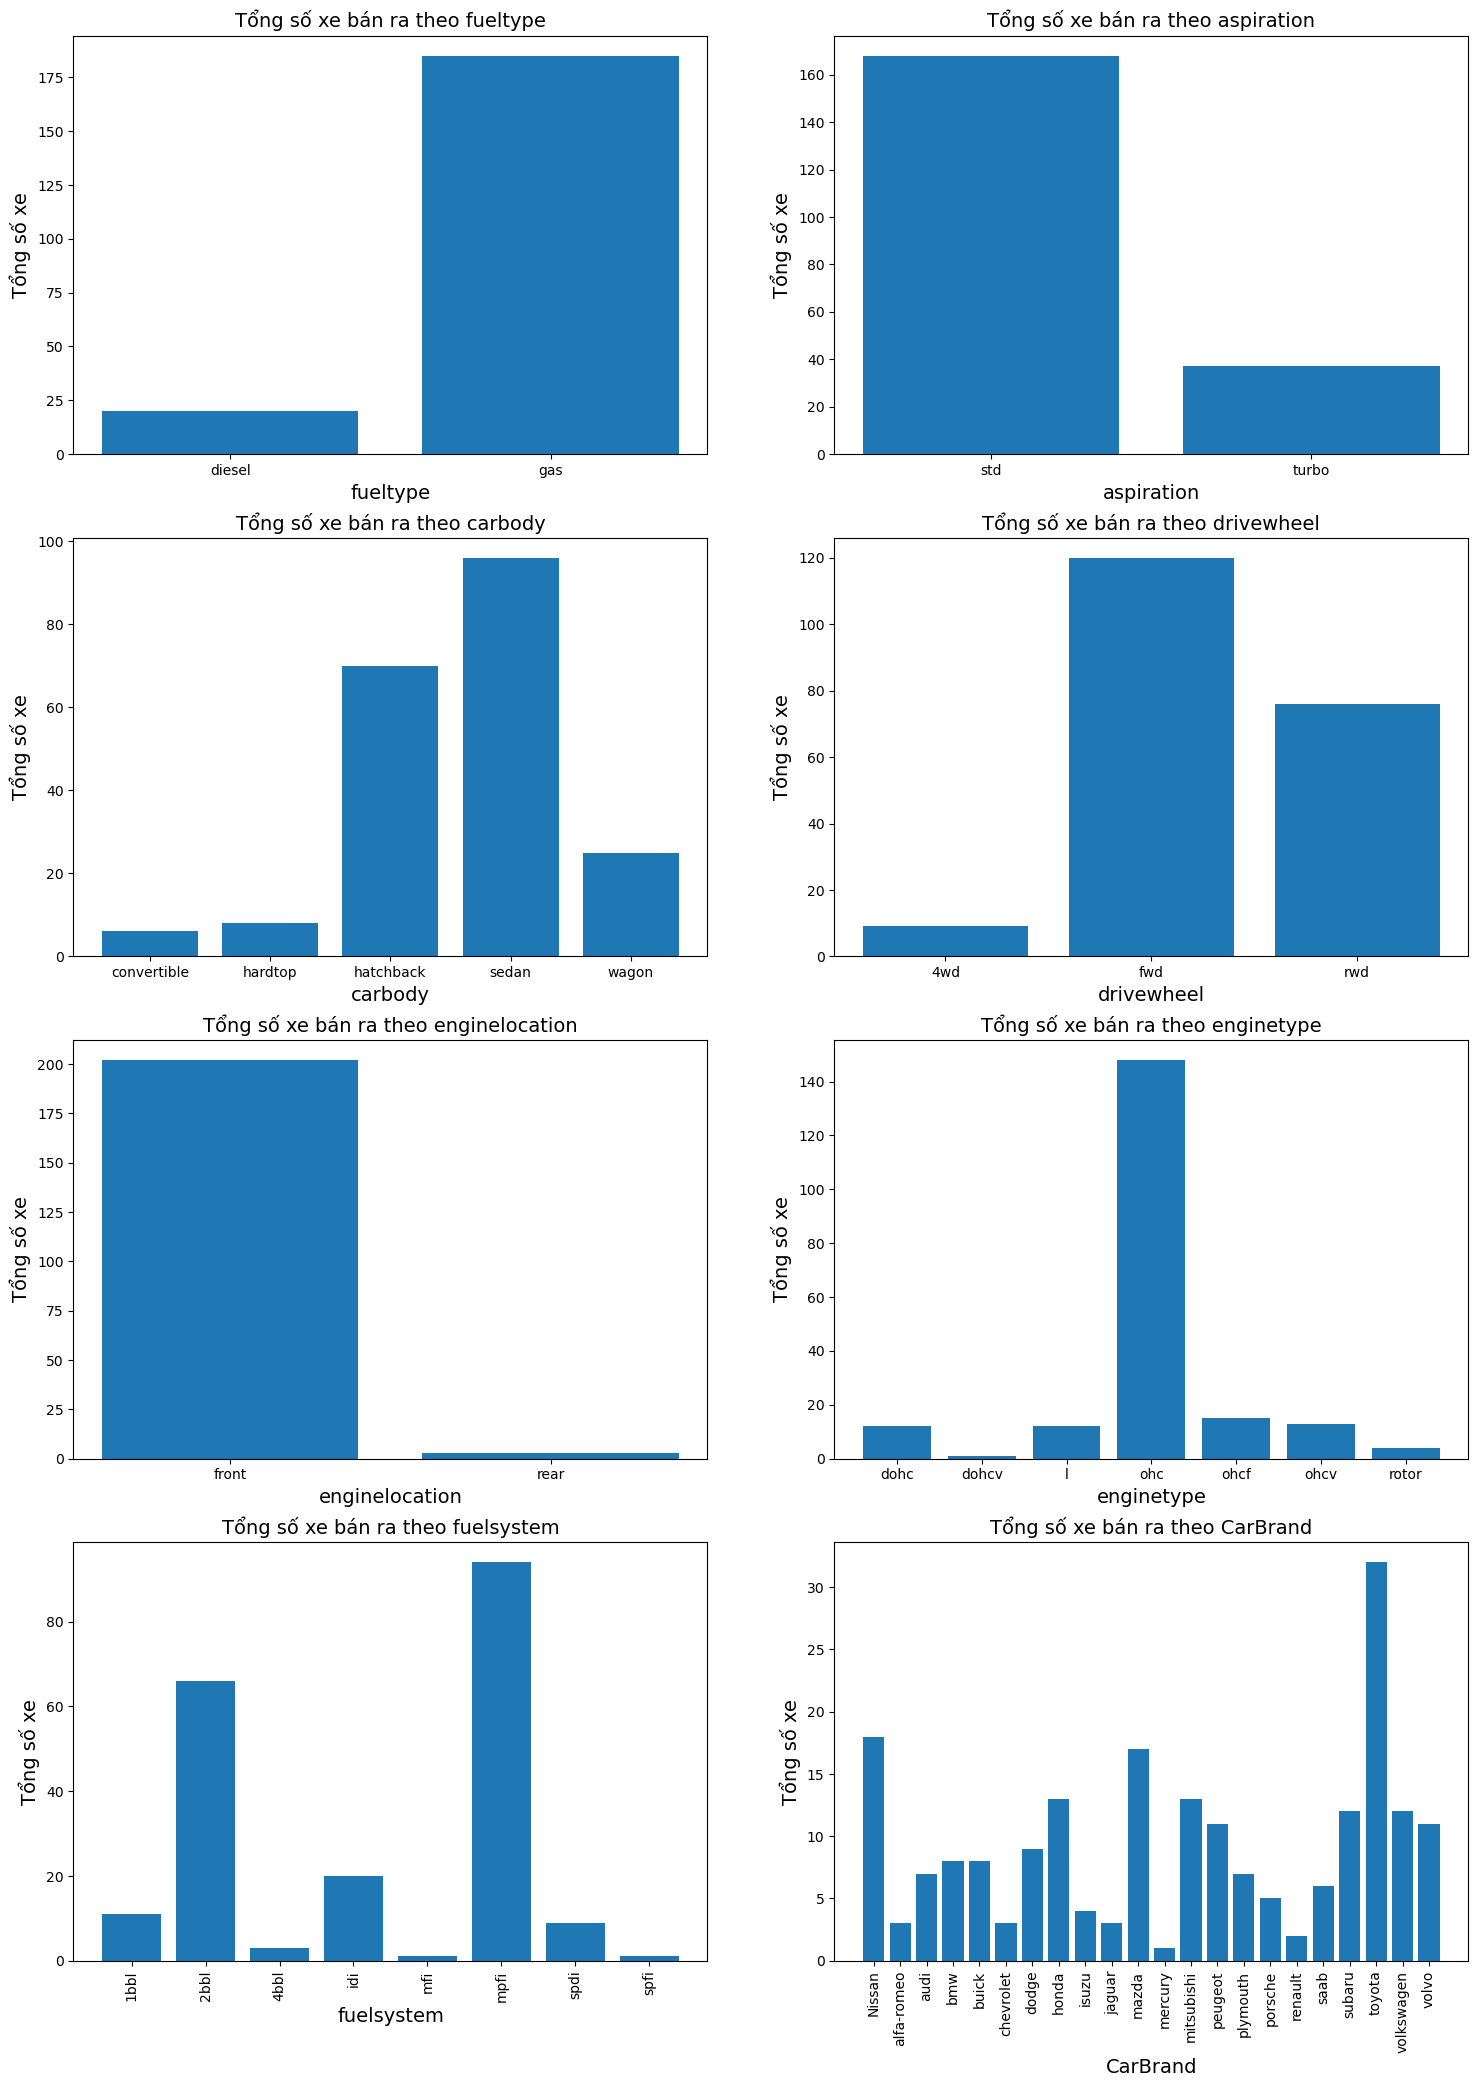

In [26]:
groupby_list = [data1.groupby(['fueltype']),
    data1.groupby(['aspiration']),
    data1.groupby(['carbody']),
    data1.groupby(['drivewheel']),
    data1.groupby(['enginelocation']),
    data1.groupby(['enginetype']),
    data1.groupby(['fuelsystem']),
    data1.groupby(['CarBrand'])
]
fig, ax = plt.subplots(4, 2)

for i, groupby_obj in enumerate(groupby_list):
    r = i // 2
    c = i % 2
    ax[r, c].bar(groupby_obj.groups.keys(), groupby_obj.size().values)
    ax[r, c].set_title(f"Tổng số xe bán ra theo {groupby_obj.grouper.names[0]}", fontsize=14)
    ax[r, c].set_xlabel(groupby_obj.grouper.names[0], fontsize=14)
    ax[r, c].set_ylabel('Tổng số xe', fontsize=14)
    if r == 3:
        ax[r, c].tick_params(axis='x', labelrotation=90)

fig.set_size_inches(18, 25)
plt.show()

In [27]:
df_heatmap = data[['wheelbase', 'carlength','carwidth','curbweight','cylindernumber','enginesize','boreratio','horsepower'
                 ,'citympg','highwaympg','price']]

In [28]:
s_scaler = StandardScaler()
df_heatmap_ch = s_scaler.fit_transform(df_heatmap)
df_heatmap_ch = pd.DataFrame(df_heatmap_ch,columns=['wheelbase', 'carlength','carwidth','curbweight',
                                                    'cylindernumber','enginesize','boreratio','horsepower'
                                                    ,'citympg','highwaympg','price'])

[[-1.6907718  -0.42652147 -0.84478235 ... -0.64655303 -0.54605874
   0.02739114]
 [-1.6907718  -0.42652147 -0.84478235 ... -0.64655303 -0.54605874
   0.4044611 ]
 [-0.70859588 -0.23151305 -0.19056612 ... -0.95301169 -0.69162706
   0.4044611 ]
 ...
 [ 1.72187336  1.19854871  1.39824472 ... -1.10624102 -1.12833203
   1.02998314]
 [ 1.72187336  1.19854871  1.39824472 ...  0.11959362 -0.54605874
   1.15358178]
 [ 1.72187336  1.19854871  1.39824472 ... -0.95301169 -0.83719538
   1.17303131]]


In [29]:
corr = df_heatmap_ch.corr()
corr

,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.776386,0.339507,0.569329,0.488750,0.353294,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.877728,0.430672,0.683360,0.606454,0.552623,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.867032,0.545007,0.735433,0.559150,0.640732,-0.642704,-0.677218,0.759325
curbweight,0.776386,0.877728,0.867032,1.000000,0.609727,0.850594,0.648480,0.750739,-0.757414,-0.797465,0.835305
cylindernumber,0.339507,0.430672,0.545007,0.609727,1.000000,0.846031,0.231399,0.692016,-0.445837,-0.466666,0.718305
enginesize,0.569329,0.683360,0.735433,0.850594,0.846031,1.000000,0.583774,0.809769,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.648480,0.231399,0.583774,1.000000,0.573677,-0.584532,-0.587012,0.553173
horsepower,0.353294,0.552623,0.640732,0.750739,0.692016,0.809769,0.573677,1.000000,-0.801456,-0.770544,0.808139
citympg,-0.470414,-0.670909,-0.642704,-0.757414,-0.445837,-0.653658,-0.584532,-0.801456,1.000000,0.971337,-0.685751
highwaympg,-0.544082,-0.704662,-0.677218,-0.797465,-0.466666,-0.677470,-0.587012,-0.770544,0.971337,1.000000,-0.697599


<AxesSubplot:>

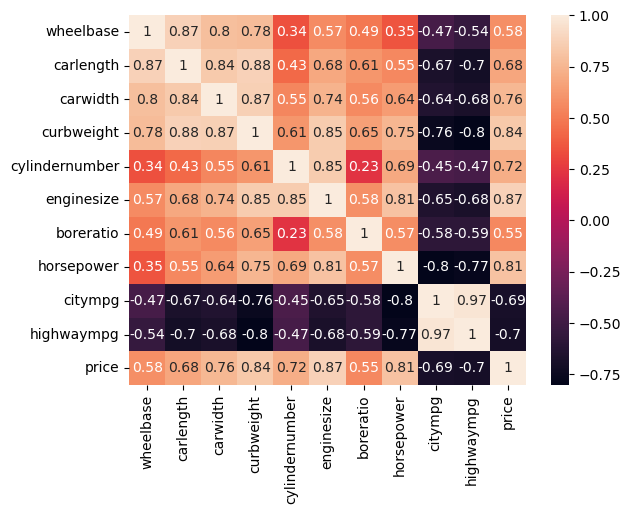

In [30]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [37]:
#mã hóa
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
obj = (data.dtypes == 'object')
for obj in list(obj[obj].index):
    data[obj] = label_encoder.fit_transform(data[obj])
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [40]:
X = data.loc[:, ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'wheelbase', 'boreratio', 'citympg', 'highwaympg', 'drivewheel', 'fuelsystem']]
y = data.price
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=7)
stds = StandardScaler()
scaler = stds.fit(x_train)
rescaledx = scaler.transform(x_train)



In [41]:
exog = sm.add_constant(rescaledx)
ols = sm.OLS(y_train, exog).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     72.45
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.07e-54
Time:                        21:20:01   Log-Likelihood:                -1556.2
No. Observations:                 164   AIC:                             3136.
Df Residuals:                     152   BIC:                             3174.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.337e+04    259.327     51.569      0.0